# Example: Poisson linear inverse problem with random datasets
Solve the following Poisson linear inverse problem
$$
\textrm{minimize}_{x\in R^n_+} \quad F(x):= D_{KL}(b, Ax) + \Psi(x)
$$
where $A\in R^{m\times n}_+$ and $b\in R^m_{++}$.

In [1]:
cd  C:\\github\accbpg

C:\github\accbpg


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'serif'})
# matplotlib.rcParams.update({'text.usetex': True})

### Comparing BPG with line search and adaptive ABPG algorithms

In [3]:
import accbpg

# Generate a random instance of the Poisson linear inverse problem of size m by n
m = 200
n = 100
f, h, L, x0 = accbpg.Poisson_regrL1(m, n, noise=0.0001, lamda=0, randseed=1)

# Solve the problem using BPG and ABPG with different values of gamma (TSE) 
x00, F00, G00, T00 = accbpg.BPG( f, h, L, x0, maxitrs=10000, linesearch=False, verbskip=1000)
x10, F10, G10, T10 = accbpg.ABPG(f, h, L, x0, gamma=1.0, maxitrs=10000, theta_eq=True, verbskip=1000)
x15, F15, G15, T15 = accbpg.ABPG(f, h, L, x0, gamma=1.5, maxitrs=10000, theta_eq=True, verbskip=1000)
x20, F20, G20, T20 = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=10000, theta_eq=True, verbskip=1000)
xDA, FDA, GDA, TDA = accbpg.ABDA(f, h, L, x0, gamma=2.0, maxitrs=10000, theta_eq=True, verbskip=1000)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   6.363e+00   1.152e+00     0.0
  1000   3.809e-03   1.152e+00     0.1
  2000   3.375e-03   1.152e+00     0.3
  3000   2.974e-03   1.152e+00     0.4
  4000   2.609e-03   1.152e+00     0.5
  5000   2.286e-03   1.152e+00     0.6
  6000   2.010e-03   1.152e+00     0.7
  7000   1.778e-03   1.152e+00     0.8
  8000   1.588e-03   1.152e+00     1.0
  9000   1.431e-03   1.152e+00     1.1

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0   6.363e+00   1.000e+00   1.000e+00   2.671e-01   2.671e-01     0.0
  1000   2.831e-02   9.990e-04   9.409e-04   1.614e-10   1.717e-04     0.2
  2000   1.263e-02   4.998e-04   4.364e-04   1.637e-11   7.506e-05     0.4
  3000   3.485e-03   3.332e-04   2.686e-05   6.661e-16   7.443e-08     0.6
  4000   6.435e-03   2.499e-04   2.783e-04   1.888e-12   2.714e-05     0.7
  5000   3.2

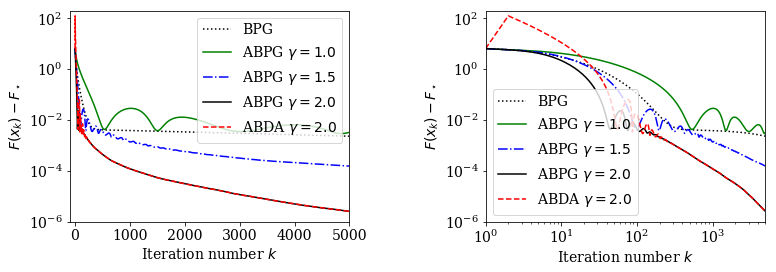

In [41]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"ABPG $\gamma=1.0$", r"ABPG $\gamma=1.5$", r"ABPG $\gamma=2.0$", r"ABDA $\gamma=2.0$"]
styles = ['k:', 'g-', 'b-.', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00, F10, F15, F20, FDA]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xlim=[-100, 5000], ylim=[1e-6, 200], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="upper right", 
                        linestyles=styles, linedash=dashes)

ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xscale="log", xlim=[1, 5000], ylim=[1e-6, 200], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="lower left", 
                        linestyles=styles, linedash=dashes)

plt.tight_layout(w_pad=4)
plt.show()

### Comparing BPG with line search and adaptive ABPG algorithms

In [8]:
# Solve the problem using BPG w/o line seach and adaptive ABPG with gamma=2 (TSE) 
x00, F00, G00, T00 = accbpg.BPG( f, h, L, x0, maxitrs=10000, linesearch=False, verbskip=1000)
xLS, FLS, GLS, TLS = accbpg.BPG( f, h, L, x0, maxitrs=10000, linesearch=True, verbskip=1000)
x20, F20, G20, T20 = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=10000, theta_eq=True, verbskip=1000)
x2e, F2e, Gamma2e, G2e, T2e = accbpg.ABPG_expo(f, h, L, x0, gamma0=3, maxitrs=10000, theta_eq=False, Gmargin=3, verbskip=1000)
x2g, F2g, G2g, Gdiv2g, Gavg2g, T2g = accbpg.ABPG_gain(f, h, L, x0, gamma=2, maxitrs=10000, G0=0.1, theta_eq=False, verbskip=1000)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   6.363e+00   1.152e+00     0.0
  1000   3.809e-03   1.152e+00     0.2
  2000   3.375e-03   1.152e+00     0.3
  3000   2.974e-03   1.152e+00     0.4
  4000   2.609e-03   1.152e+00     0.5
  5000   2.286e-03   1.152e+00     0.6
  6000   2.010e-03   1.152e+00     0.7
  7000   1.778e-03   1.152e+00     0.9
  8000   1.588e-03   1.152e+00     1.0
  9000   1.431e-03   1.152e+00     1.1

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   6.363e+00   5.760e-01     0.0
  1000   1.311e-04   1.800e-02     0.3
  2000   7.977e-05   1.800e-02     0.5
  3000   5.894e-05   1.800e-02     0.8
  4000   4.811e-05   1.800e-02     1.0
  5000   4.130e-05   9.000e-03     1.3
  6000   3.667e-05   1.800e-02     1.5
  7000   3.333e-05   4.500e-03     1.8
  8000   3.089e-05   9.000e-03     2.0
  9000   2.904e-05   1.800e-02     2.3

ABPG method for minimize_{x in C} F

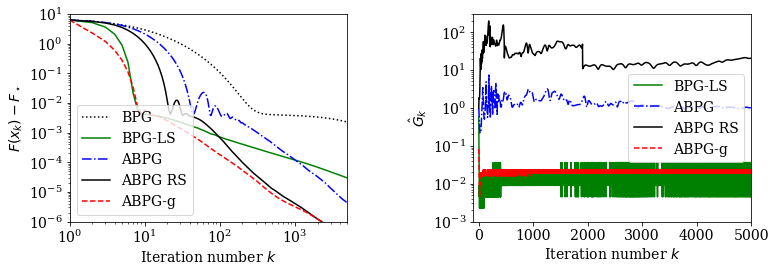

In [43]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"BPG-LS", r"ABPG", r"ABPG RS", r"ABPG-g", r"ABPG-g RS"]
styles = ['k:', 'g-', 'b-.', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00, FLS, F20, F2e, F2g]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xscale="log", xlim=[1, 5000], ylim=[1e-6, 10], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="lower left", 
                        linestyles=styles, linedash=dashes)

ax2 = plt.subplot(1, 2, 2)
y_vals = [GLS, G20, G2e, G2g]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[-100, 5000], ylim=[1e-3, 300], 
                        xlabel=r"Iteration number $k$", ylabel=r'$\hat{G}_k$', legendloc="center right", 
                        linestyles=styles[1:], linedash=dashes[1:])

plt.tight_layout(w_pad=4)
plt.show()

### A under-determined problem with $\ell_2$ regularization

In [27]:
# Generate a random instance of the Poisson linear inverse problem of size m by n
m2 = 100
n2 = 1000
f2, h2, L2, x02 = accbpg.Poisson_regrL2(m2, n2, noise=0.001, lamda=0.001, randseed=1)

# Solve the problem using BPG w/o line seach and adaptive ABPG with gamma=2 (TSE) 
x00_, F00_, G00_, T00_ = accbpg.BPG( f2, h2, L2, x02, maxitrs=10000, linesearch=False, verbskip=1000)
xLS_, FLS_, GLS_, TLS_ = accbpg.BPG( f2, h2, L2, x02, maxitrs=10000, linesearch=True, ls_ratio=1.5, verbskip=1000)
x20_, F20_, G20_, T20_ = accbpg.ABPG(f2, h2, L2, x02, gamma=2.0, maxitrs=10000, theta_eq=False, verbskip=1000)
x2e_, F2e_, _, G2e_, T2e_ = accbpg.ABPG_expo(f2, h2, L2, x02, gamma0=3, maxitrs=10000, theta_eq=False, Gmargin=1, verbskip=1000)
x2g_, F2g_, G2g_, _, _, _ = accbpg.ABPG_gain(f2, h2, L2, x02, gamma=2, maxitrs=10000, G0=0.1, ls_inc=1.5, ls_dec=1.5, theta_eq=True, verbskip=1000)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   3.220e-02   1.262e+00     0.0
  1000   5.777e-03   1.262e+00     0.3
  2000   1.364e-03   1.262e+00     0.5
  3000   7.111e-04   1.262e+00     0.7
  4000   6.165e-04   1.262e+00     0.9
  5000   6.002e-04   1.262e+00     1.2
  6000   5.946e-04   1.262e+00     1.4
  7000   5.905e-04   1.262e+00     1.6
  8000   5.866e-04   1.262e+00     1.8
  9000   5.828e-04   1.262e+00     2.0

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   3.220e-02   8.411e-01     0.0
  1000   1.499e-06   8.537e-04     0.5
  2000   1.227e-06   8.537e-04     1.0
  3000   1.224e-06   1.921e-03     1.6
  4000   1.221e-06   1.280e-03     2.1
  5000   1.219e-06   5.691e-04     2.6
  6000   1.216e-06   8.537e-04     3.2
  7000   1.215e-06   1.280e-03     3.7
  8000   1.213e-06   8.537e-04     4.2
  9000   1.210e-06   5.691e-04     4.7

ABPG method for minimize_{x in C} F

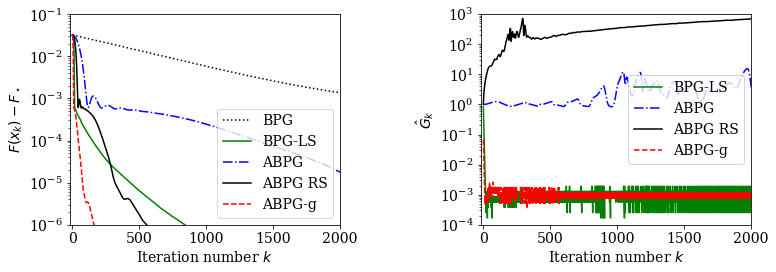

In [44]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"BPG-LS", r"ABPG", r"ABPG RS", r"ABPG-g", r"ABPG-g RS"]
styles = ['k:', 'g-', 'b-.', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00_, FLS_, F20_, F2e_, F2g_]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xlim=[-20, 2000], ylim=[1e-6, 1e-1], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="lower right", 
                        linestyles=styles, linedash=dashes)

ax2 = plt.subplot(1, 2, 2)
y_vals = [GLS_, G20_, G2e_, G2g_]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[-20, 2000], ylim=[1e-4, 1e3], 
                        xlabel=r"Iteration number $k$", ylabel=r'$\hat{G}_k$', legendloc="center right", 
                        linestyles=styles[1:], linedash=dashes[1:])

plt.tight_layout(w_pad=4)
plt.show()